In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp
import sys
import Bio
from Bio import SeqIO, SeqFeature
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

from IPython.display import display
pd.options.display.max_columns = 250
pd.options.display.max_rows = 800

Populating the interactive namespace from numpy and matplotlib


In [2]:
def build_snp_df(gff_dir,prefix,cds_start,cds_end):
    
    #parse in snpcalling and restrict to trfA_CDS
    count = 0
    for filename in os.listdir(gff_dir):
        sample_name=(filename.decode('utf-8').rstrip('.sorted.bam.var.txt'))
        sample = os.path.join(gff_dir, filename)
        if os.path.isfile(sample) and prefix in sample_name:
            df_sample = pd.read_table(sample.decode('utf-8'))
            df_cds = df_sample[df_sample.pos>cds_start]
            df_cds = df_cds[df_cds.pos<cds_end]
            #df_cds = df_sample.query("pos > cds_start & pos < cds_end")
            df_cds['Sample'] = sample_name
            
            df_cds.replace(to_replace = 0, value = 1, inplace=True)
            df_cds['norm_mismatch'] = df_cds.mismatches/df_cds.reads_all
            df_cds['norm_match'] = df_cds.matches/df_cds.reads_all
            df_cds['norm_A'] = df_cds['A']/df_cds.reads_all
            df_cds['norm_T'] = df_cds['T']/df_cds.reads_all
            df_cds['norm_C'] = df_cds['C']/df_cds.reads_all
            df_cds['norm_G'] = df_cds['G']/df_cds.reads_all
            
            aa_list = []
            aa_pos = []
            countaa = 1
            
            if count == 0:
                df_snp = df_cds.copy()
                count = 1
                
                for x in Seq(''.join(df_snp.ref)).translate():
                    aa_list.extend([x,x,x])
                    aa_pos.extend([countaa,countaa,countaa])
                    countaa=countaa+1
                
                
            if count == 1:
                df_snp = pd.concat([df_snp,df_cds])
            
    return df_snp
            



In [5]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_BBR1_snp=build_snp_df(gff_dir,'BBR1',2116,2780)

In [6]:
df_BBR1_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G
1877,Gent_BBR1,2117,A,74383,70189,74357,70164,25,24,1,1,1,1,74357,70164,3,3,11,11,11,10,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000336,0.999650,0.999650,0.000148,0.000040,0.000148
1878,Gent_BBR1,2118,T,75702,71426,75671,71395,31,31,1,1,1,1,20,20,10,10,75671,71395,1,1,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000410,0.999590,0.000264,0.999590,0.000132,0.000013
1879,Gent_BBR1,2119,G,75714,71451,75689,71426,22,22,3,3,1,1,14,14,4,4,4,4,75689,71426,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000291,0.999670,0.000185,0.000053,0.000053,0.999670
1880,Gent_BBR1,2120,G,76400,72100,76353,72056,47,44,1,1,1,1,34,32,1,1,12,12,76353,72056,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000615,0.999385,0.000445,0.000157,0.000013,0.999385
1881,Gent_BBR1,2121,C,76312,72028,76273,71991,35,33,4,4,1,1,5,5,76273,71991,27,26,3,2,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000459,0.999489,0.000066,0.000354,0.999489,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Gent_BBR1,2775,G,11490,9401,11487,9399,3,2,1,1,1,1,2,2,1,1,1,1,11487,9399,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000261,0.999739,0.000174,0.000087,0.000087,0.999739
2176,Gent_BBR1,2776,G,11410,9322,11410,9322,1,1,1,1,1,1,1,1,1,1,1,1,11410,9322,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000088,1.000000,0.000088,0.000088,0.000088,1.000000
2177,Gent_BBR1,2777,T,11421,9329,11415,9323,6,6,1,1,1,1,1,1,5,5,11415,9323,1,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000525,0.999475,0.000088,0.999475,0.000438,0.000088
2178,Gent_BBR1,2778,A,11459,9359,11455,9356,4,3,1,1,1,1,11455,9356,1,1,2,2,2,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000349,0.999651,0.999651,0.000175,0.000087,0.000175


In [8]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_snp=build_snp_df(gff_dir,'BBR1',2116,2780)
sample_meta = pd.read_csv('sample_groups_BBR1.csv')
group_map = dict(zip(sample_meta['Sample'],sample_meta['Group']))
df_snp['Group'] = df_snp['Sample'].map(group_map)

aa_list = []
aa_pos = []

count = 1
for x in Seq(''.join(df_snp[df_snp.Sample=='BBR1-unselected-rep1_S10_L001_mapping'].ref)).translate():
    aa_list.extend([x,x,x])
    aa_pos.extend([count,count,count])
    count=count+1

df_aa = pd.DataFrame([aa_list,aa_pos]).transpose()

df_aa['pos'] = df_snp[df_snp.Sample=='BBR1-unselected-rep1_S10_L001_mapping'].pos.tolist()

aa_map = dict(zip(df_aa['pos'],df_aa[0]))
aapos_map = dict(zip(df_aa['pos'],df_aa[1]))

df_snp['AA'] = df_snp['pos'].map(aa_map)
df_snp['AApos'] = df_snp['pos'].map(aapos_map)
#df_snp['AApos'] = df_snp['AApos']-383
df_snp['AAInfo'] = df_snp.AA + df_snp.AApos.astype(str)




df_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
1877,Gent_BBR1,2117,A,74383,70189,74357,70164,25,24,1,1,1,1,74357,70164,3,3,11,11,11,10,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000336,0.999650,0.999650,0.000148,0.000040,0.000148,Selection_2,M,1,M1
1878,Gent_BBR1,2118,T,75702,71426,75671,71395,31,31,1,1,1,1,20,20,10,10,75671,71395,1,1,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000410,0.999590,0.000264,0.999590,0.000132,0.000013,Selection_2,M,1,M1
1879,Gent_BBR1,2119,G,75714,71451,75689,71426,22,22,3,3,1,1,14,14,4,4,4,4,75689,71426,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000291,0.999670,0.000185,0.000053,0.000053,0.999670,Selection_2,M,1,M1
1880,Gent_BBR1,2120,G,76400,72100,76353,72056,47,44,1,1,1,1,34,32,1,1,12,12,76353,72056,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000615,0.999385,0.000445,0.000157,0.000013,0.999385,Selection_2,A,2,A2
1881,Gent_BBR1,2121,C,76312,72028,76273,71991,35,33,4,4,1,1,5,5,76273,71991,27,26,3,2,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000459,0.999489,0.000066,0.000354,0.999489,0.000039,Selection_2,A,2,A2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Gent_BBR1,2775,G,11490,9401,11487,9399,3,2,1,1,1,1,2,2,1,1,1,1,11487,9399,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000261,0.999739,0.000174,0.000087,0.000087,0.999739,Selection_2,R,220,R220
2176,Gent_BBR1,2776,G,11410,9322,11410,9322,1,1,1,1,1,1,1,1,1,1,1,1,11410,9322,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000088,1.000000,0.000088,0.000088,0.000088,1.000000,Selection_2,R,220,R220
2177,Gent_BBR1,2777,T,11421,9329,11415,9323,6,6,1,1,1,1,1,1,5,5,11415,9323,1,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000525,0.999475,0.000088,0.999475,0.000438,0.000088,Selection_2,*,221,*221
2178,Gent_BBR1,2778,A,11459,9359,11455,9356,4,3,1,1,1,1,11455,9356,1,1,2,2,2,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000349,0.999651,0.999651,0.000175,0.000087,0.000175,Selection_2,*,221,*221


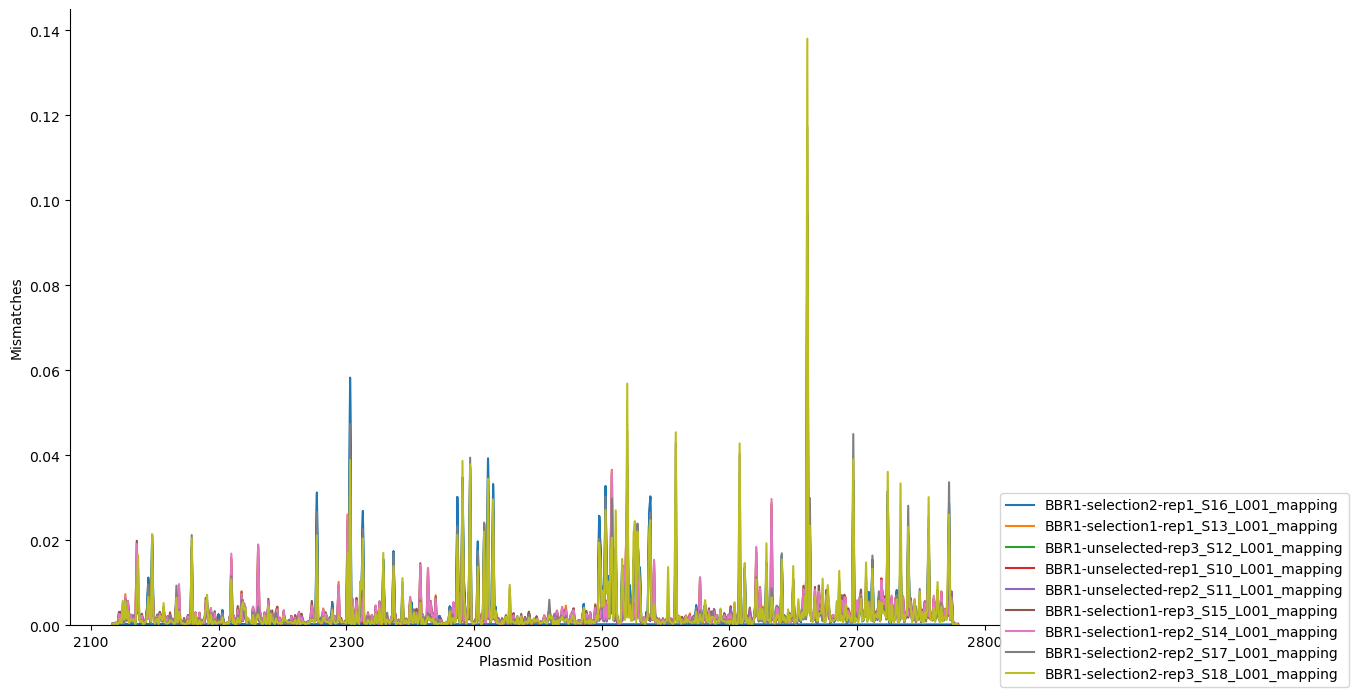

In [9]:
plt.figure(figsize=(12,8))
for cond in df_snp.Sample.unique():
    plt.plot(df_snp[df_snp.Sample==cond].pos,df_snp[df_snp.Sample==cond].norm_mismatch)
    
plt.legend(df_snp.Sample.unique(),loc=(1,-0.1))
plt.ylim(0,)
plt.ylabel('Mismatches')
plt.xlabel('Plasmid Position')
sns.despine()

In [10]:
df_snp.Sample.unique()

array(['BBR1-selection2-rep1_S16_L001_mapping',
       'BBR1-selection1-rep1_S13_L001_mapping',
       'BBR1-unselected-rep3_S12_L001_mapping',
       'BBR1-unselected-rep1_S10_L001_mapping',
       'BBR1-unselected-rep2_S11_L001_mapping',
       'BBR1-selection1-rep3_S15_L001_mapping',
       'BBR1-selection1-rep2_S14_L001_mapping',
       'BBR1-selection2-rep2_S17_L001_mapping',
       'BBR1-selection2-rep3_S18_L001_mapping'], dtype=object)

In [12]:
df_mutant = df_snp[df_snp.Sample.isin(['BBR1-selection2-rep1_S16_L001_mapping',
       'BBR1-selection1-rep1_S13_L001_mapping',
        'BBR1-selection1-rep3_S15_L001_mapping',
       'BBR1-selection1-rep2_S14_L001_mapping',
       'BBR1-selection2-rep2_S17_L001_mapping',
       'BBR1-selection2-rep3_S18_L001_mapping'])]

In [13]:
time_zero = df_snp[df_snp.Sample.isin(['BBR1-unselected-rep3_S12_L001_mapping',
       'BBR1-unselected-rep1_S10_L001_mapping',
       'BBR1-unselected-rep2_S11_L001_mapping'])].groupby(['pos']).mean()

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_92038/2274615303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_zero = df_snp[df_snp.Sample.isin(['BBR1-unselected-rep3_S12_L001_mapping',


In [14]:
time_zero

,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,AApos
pos,,,,,,,,,,,,,,,,,,,,,,,,,,,
2117,68025.333333,61489.000000,68002.000000,61468.000000,21.666667,20.000000,2.000000,1.333333,1.000000,1.000000,68002.000000,61468.000000,1.666667,1.666667,4.333333,4.333333,15.666667,14.333333,1.0,1.0,0.000318,0.999659,0.999659,0.000064,0.000024,0.000230,1.0
2118,69334.666667,62648.666667,69303.000000,62620.000000,30.666667,28.000000,1.333333,1.000000,1.000000,1.000000,20.333333,19.333333,8.333333,7.333333,69303.000000,62620.000000,2.000000,1.666667,1.0,1.0,0.000443,0.999543,0.000295,0.999543,0.000118,0.000029,1.0
2119,69402.333333,62733.666667,69368.666667,62703.333333,28.666667,25.666667,5.000000,4.666667,1.000000,1.000000,21.333333,19.333333,1.333333,1.333333,6.333333,5.333333,69368.666667,62703.333333,1.0,1.0,0.000407,0.999520,0.000303,0.000090,0.000019,0.999520,1.0
2120,70103.000000,63367.666667,70074.333333,63341.666667,28.666667,26.000000,1.000000,1.000000,1.000000,1.000000,16.666667,15.000000,2.666667,2.666667,9.333333,8.333333,70074.333333,63341.666667,1.0,1.0,0.000413,0.999587,0.000241,0.000134,0.000038,0.999587,2.0
2121,70013.666667,63297.333333,69975.000000,63262.666667,36.666667,33.000000,2.000000,1.666667,1.000000,1.000000,7.666667,7.666667,69975.000000,63262.666667,23.000000,20.333333,6.000000,5.000000,1.0,1.0,0.000516,0.999455,0.000109,0.000323,0.999455,0.000084,2.0
2122,69901.333333,63217.333333,69738.000000,63068.000000,162.333333,148.333333,1.666667,1.666667,1.000000,1.000000,28.000000,25.666667,69738.000000,63068.000000,133.000000,121.333333,1.333333,1.333333,1.0,1.0,0.002351,0.997633,0.000408,0.001924,0.997633,0.000019,2.0
2123,70546.666667,63824.666667,70341.666667,63640.333333,203.666667,183.000000,1.666667,1.666667,1.000000,1.000000,70341.666667,63640.333333,35.666667,32.333333,139.000000,124.000000,29.000000,26.666667,1.0,1.0,0.002895,0.997085,0.997085,0.001972,0.000513,0.000410,3.0
2124,70656.000000,63939.333333,70588.666667,63877.333333,67.000000,61.666667,1.000000,1.000000,1.000000,1.000000,49.000000,46.000000,70588.666667,63877.333333,13.000000,11.000000,5.000000,4.666667,1.0,1.0,0.000955,0.999041,0.000697,0.000187,0.999041,0.000071,3.0
2125,70676.666667,63977.333333,70483.666667,63804.333333,192.666667,172.666667,1.000000,1.000000,1.000000,1.000000,149.000000,134.000000,10.333333,8.333333,33.333333,30.333333,70483.666667,63804.333333,1.0,1.0,0.002746,0.997249,0.002134,0.000468,0.000144,0.997249,3.0


Text(0, 0.5, 'Mismatch Rate')

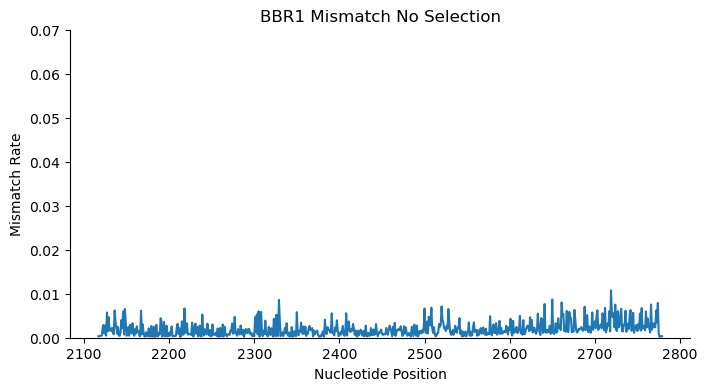

In [31]:
plt.figure(figsize=(8,4))
plt.plot(time_zero.index,time_zero.norm_mismatch)
sns.despine()
plt.title('BBR1 Mismatch No Selection')
plt.ylim(0,.07)
plt.xlabel('Nucleotide Position')
plt.ylabel('Mismatch Rate')

In [15]:
d_match = []
d_mismatch = []
d_a = []
d_t = []
d_c = []
d_g = []

for row in df_mutant.iterrows():
    temp_zero = time_zero[time_zero.index==row[1].pos]
    d_mismatch.append(row[1].norm_mismatch/temp_zero.norm_mismatch.values[0])
    d_match.append(row[1].norm_match/temp_zero.norm_match.values[0])
    d_a.append(row[1].norm_A/temp_zero.norm_A.values[0])
    d_t.append(row[1].norm_T/temp_zero.norm_T.values[0])
    d_c.append(row[1].norm_C /temp_zero.norm_C.values[0])
    d_g.append(row[1].norm_G/temp_zero.norm_G.values[0])





In [16]:
df_mutant['change_mismatch'] = d_mismatch
df_mutant['change_match'] = d_match
df_mutant['change_a'] = d_a
df_mutant['change_t'] = d_t
df_mutant['change_c'] = d_c
df_mutant['change_g'] = d_g


df_mutant

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_92038/3016496591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_mismatch'] = d_mismatch
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_92038/3016496591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_match'] = d_match
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_92038/3016496591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo,change_mismatch,change_match,change_a,change_t,change_c,change_g
1877,Gent_BBR1,2117,A,74383,70189,74357,70164,25,24,1,1,1,1,74357,70164,3,3,11,11,11,10,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000336,0.999650,0.999650,0.000148,0.000040,0.000148,Selection_2,M,1,M1,1.057216,0.999991,0.999991,2.321720,1.669927,0.642799
1878,Gent_BBR1,2118,T,75702,71426,75671,71395,31,31,1,1,1,1,20,20,10,10,75671,71395,1,1,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000410,0.999590,0.000264,0.999590,0.000132,0.000013,Selection_2,M,1,M1,0.924752,1.000047,0.894846,1.000047,1.114849,0.454035
1879,Gent_BBR1,2119,G,75714,71451,75689,71426,22,22,3,3,1,1,14,14,4,4,4,4,75689,71426,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000291,0.999670,0.000185,0.000053,0.000053,0.999670,Selection_2,M,1,M1,0.713439,1.000150,0.610462,0.584399,2.727061,1.000150
1880,Gent_BBR1,2120,G,76400,72100,76353,72056,47,44,1,1,1,1,34,32,1,1,12,12,76353,72056,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000615,0.999385,0.000445,0.000157,0.000013,0.999385,Selection_2,A,2,A2,1.489785,0.999798,1.847856,1.174479,0.341159,0.999798
1881,Gent_BBR1,2121,C,76312,72028,76273,71991,35,33,4,4,1,1,5,5,76273,71991,27,26,3,2,1,1,BBR1-selection2-rep1_S16_L001_mapping,0.000459,0.999489,0.000066,0.000354,0.999489,0.000039,Selection_2,A,2,A2,0.888305,1.000034,0.602065,1.094651,1.000034,0.466509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Gent_BBR1,2775,G,11490,9401,11487,9399,3,2,1,1,1,1,2,2,1,1,1,1,11487,9399,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000261,0.999739,0.000174,0.000087,0.000087,0.999739,Selection_2,R,220,R220,0.255939,1.000760,0.313345,0.233036,0.954529,1.000760
2176,Gent_BBR1,2776,G,11410,9322,11410,9322,1,1,1,1,1,1,1,1,1,1,1,1,11410,9322,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000088,1.000000,0.000088,0.000088,0.000088,1.000000,Selection_2,R,220,R220,0.440001,1.000199,0.954031,1.012682,3.414660,1.000199
2177,Gent_BBR1,2777,T,11421,9329,11415,9323,6,6,1,1,1,1,1,1,5,5,11415,9323,1,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000525,0.999475,0.000088,0.999475,0.000438,0.000088,Selection_2,*,221,*221,1.581170,0.999807,0.623194,0.999807,3.278123,1.504307
2178,Gent_BBR1,2778,A,11459,9359,11455,9356,4,3,1,1,1,1,11455,9356,1,1,2,2,2,1,1,1,BBR1-selection2-rep3_S18_L001_mapping,0.000349,0.999651,0.999651,0.000175,0.000087,0.000175,Selection_2,*,221,*221,1.442073,0.999900,0.999900,8.189715,2.014993,0.983625


In [17]:
df_mutant.to_csv('Matthew_Rawish_BBR1_data.csv')

In [18]:
mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()
mutant_means

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_92038/1969063143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()


reads_all      reads_pp  \
Group       pos  ref AApos AA AAInfo                               
Selection_1 2117 A   1     M  M1      50480.333333  47622.666667   
            2118 T   1     M  M1      51465.333333  48549.666667   
            2119 G   1     M  M1      51444.000000  48540.666667   
            2120 G   2     A  A2      51950.000000  49017.333333   
            2121 C   2     A  A2      51861.666667  48937.333333   
...                                            ...           ...   
Selection_2 2775 G   220   R  R220    78054.000000  70837.250000   
            2776 G   220   R  R220    77640.750000  70440.250000   
            2777 T   221   *  *221    77428.000000  70223.750000   
            2778 A   221   *  *221    77411.500000  70185.500000   
            2779 G   221   *  *221    77384.500000  70152.000000   

                                           matches    matches_pp  mismatches  \
Group       pos  ref AApos AA AAInfo                                           
Selection_1 2117 A   1     M  M1      50462.333333  47606.666667   17.000000   
            2118 T   1     M  M1      51439.666667  48526.000000   25.000000   
            2119 G   1     M  M1      51420.333333  48518.000000   20.333333   
            2120 G   2     A  A2      51925.000000  48994.000000   25.000000   
            2121 C   2     A  A2      51832.000000  48910.666667   27.333333   
...                                            ...           ...         ...   
Selection_2 2775 G   220   R  R220    78015.750000  70804.000000   38.250000   
            2776 G   220   R  R220    77623.500000  70427.000000   17.500000   
            2777 T   221   *  *221    77399.750000  70201.250000   27.750000   
            2778 A   221   *  *221    77392.500000  70171.750000   18.500000   
            2779 G   221   *  *221    77366.750000  70136.750000   17.500000   

                                      mismatches_pp  deletions  deletions_pp  \
Group       pos  ref AApos AA AAInfo                                           
Selection_1 2117 A   1     M  M1          15.333333   1.333333      1.000000   
            2118 T   1     M  M1          23.000000   1.000000      1.000000   
            2119 G   1     M  M1          19.666667   3.333333      3.000000   
            2120 G   2     A  A2          23.333333   1.000000      1.000000   
            2121 C   2     A  A2          24.666667   2.666667      2.333333   
...                                             ...        ...           ...   
Selection_2 2775 G   220   R  R220        33.250000   1.000000      1.000000   
            2776 G   220   R  R220        13.500000   1.000000      1.000000   
            2777 T   221   *  *221        22.000000   1.000000      1.000000   
            2778 A   221   *  *221        13.250000   1.250000      1.250000   
            2779 G   221   *  *221        15.000000   1.000000      1.000000   

                                      insertions  insertions_pp             A  \
Group       pos  ref AApos AA AAInfo                                            
Selection_1 2117 A   1     M  M1            1.00            1.0  50462.333333   
            2118 T   1     M  M1            1.00            1.0     14.666667   
            2119 G   1     M  M1            1.00            1.0     13.000000   
            2120 G   2     A  A2            1.00            1.0     14.000000   
            2121 C   2     A  A2            1.00            1.0      4.666667   
...                                          ...            ...           ...   
Selection_2 2775 G   220   R  R220          1.50            1.0     27.500000   
            2776 G   220   R  R220          1.75            1.0      9.000000   
            2777 T   221   *  *221          1.50            1.0     10.250000   
            2778 A   221   *  *221          2.00            1.0  77392.500000   
            2779 G   221   *  *221          1.00            1.0     11.750000   

                    

In [19]:
mutant_means = mutant_means.reset_index()

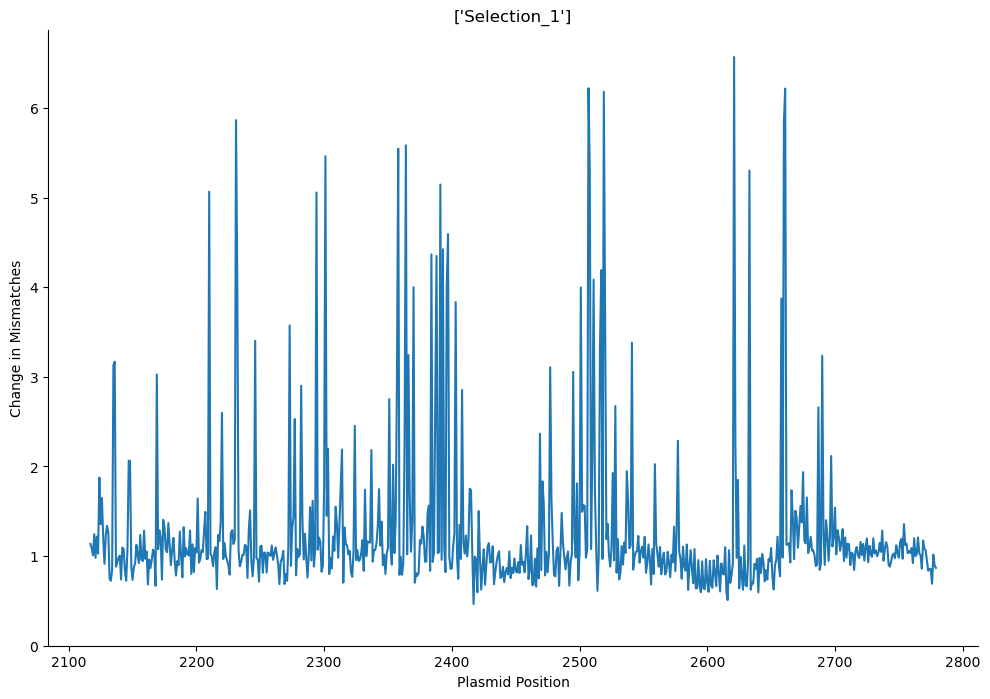

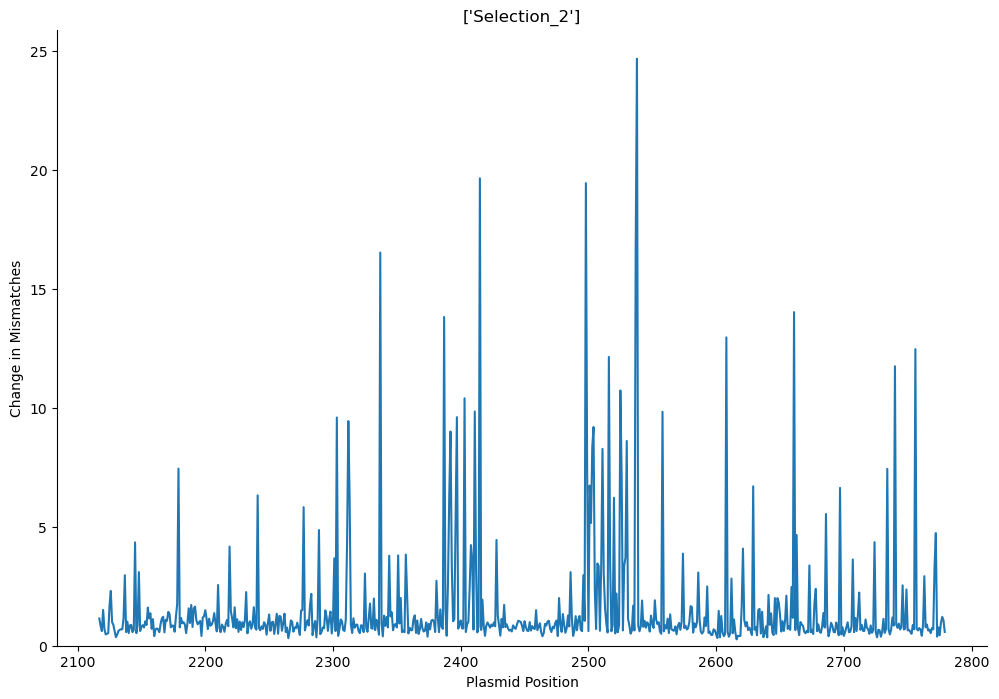

In [20]:
for cond in mutant_means.Group.unique():
    plt.figure(figsize=(12,8))
    plt.plot(mutant_means[mutant_means.Group==cond].pos,mutant_means[mutant_means.Group==cond].change_mismatch)
    plt.ylim(0,)
    plt.title(mutant_means[mutant_means.Group==cond].Group.unique())
    plt.ylabel('Change in Mismatches')
    plt.xlabel('Plasmid Position')
    sns.despine()

In [23]:
for x in [2,2.5,3,4,5,7,8,9]:
    print(x,len(mutant_means[mutant_means.change_mismatch>x].pos.unique()))



2 126
2.5 103
3 92
4 64
5 50
7 27
8 23
9 20


In [25]:
selected_snps = mutant_means[mutant_means.change_mismatch>8].pos.unique()

In [26]:
mutant_means[mutant_means.pos.isin(selected_snps)].sort_values(by='pos').to_csv('mathew_selected_BBR1muts.csv')

Text(0.5, 1.0, 'BBR1')

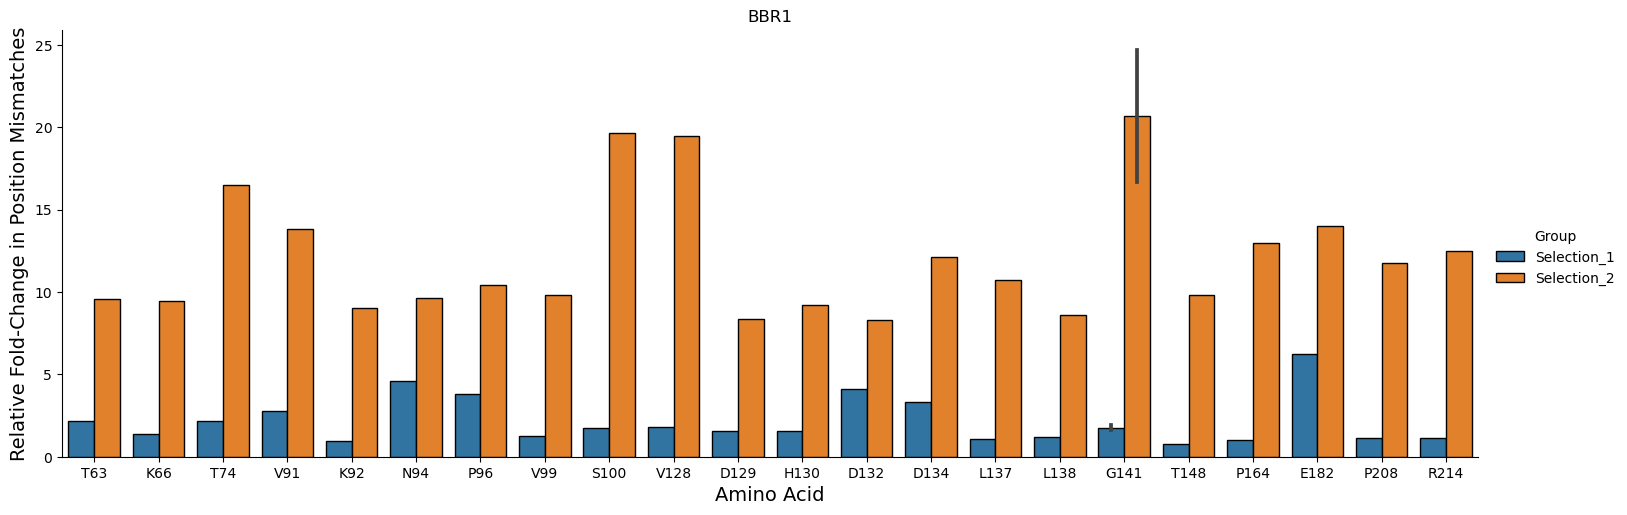

In [27]:
sns.catplot(data=mutant_means[mutant_means.pos.isin(selected_snps)],
            x='AAInfo',y='change_mismatch',hue='Group',kind='bar',aspect=3,edgecolor='black')
plt.ylabel('Relative Fold-Change in Position Mismatches',size=14)
plt.xlabel('Amino Acid',size=14)
plt.title('BBR1')

In [ ]:
#https://www.uniprot.org/uniprotkb/P07676/entry
#put AA at each position